# Métodos Ensemble

## Bagging

Bagging é usado para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de diferentes subsets no dataset de treino.


http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Um classificador Bagging é um meta-estimador ensemble que faz o fit de classificadores base, cada um em subconjuntos aleatórios do conjunto de dados original e, em seguida, agrega suas previsões individuais (por votação ou por média) para formar uma previsão final. 

Tal meta-estimador pode tipicamente ser usado como uma maneira de reduzir a variância de um estimador (por exemplo, uma árvore de decisão), introduzindo a randomização em seu procedimento de construção e fazendo um ensemble (conjunto) a partir dele.

## Importando biblotecas

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Carga de dados

In [2]:

digits = load_digits()

<Figure size 432x288 with 0 Axes>

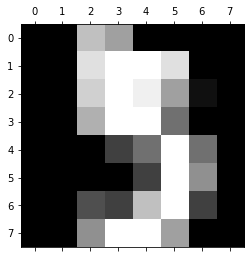

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show() 

## Pré-processamento

### Coloca todos os dados na mesma escala

In [4]:

data = scale(digits.data)

### Variáveis preditoras e variável target

In [5]:

X = data
y = digits.target

## Construção do Classificador

In [6]:
bagging = BaggingClassifier(KNeighborsClassifier())

In [7]:
bagging

BaggingClassifier(base_estimator=KNeighborsClassifier())

In [9]:

scores = cross_val_score(bagging, X, y)

In [10]:

mean = scores.mean()

In [11]:
print(scores)

[0.93055556 0.92222222 0.95821727 0.96935933 0.93314763]


In [12]:
print(mean)

0.9427004023522129


## Extremely Randomized Trees (ExtraTrees)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

## Importando Biliotecas

In [13]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

### Carregando os dados

In [14]:
digits = load_digits()

### Pré-processamento

In [15]:

data = scale(digits.data)

In [16]:
X = data
y = digits.target

## Cria o classificador com uma árvore de decisão

In [17]:

clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.78055556 0.71388889 0.80779944 0.8356546  0.79665738]
0.7869111730114515


## Cria o classificador com Random Forest

In [18]:
clf = RandomForestClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.89166667 0.88055556 0.91643454 0.93036212 0.90807799]
0.9054193748065614


## Cria o classificador com Extra Tree

In [19]:

clf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0)
scores = cross_val_score(clf, X, y)
mean = scores.mean()
print(scores)
print(mean)

[0.90277778 0.86944444 0.93593315 0.95264624 0.91364903]
0.9148901268956979


## Adaboost

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

Um classificador AdaBoost é um meta-estimador que começa ajustando um classificador no conjunto de dados original e depois ajusta cópias adicionais do classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente são ajustados para que os classificadores subsequentes se concentrem mais em casos difíceis.

## Importando bibliotecas

In [20]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score

## Carregandos os dados

In [21]:

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart = fetch_openml("heart")

In [22]:
heart

{'data': <270x13 sparse matrix of type '<class 'numpy.float64'>'
 	with 3378 stored elements in Compressed Sparse Row format>,
 'target': array([ 1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
         1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
        -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
         1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
         1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
         1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
         1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
         1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
        -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1

In [23]:
X = heart.data
y = np.copy(heart.target)
y[y == -1] = 0

In [24]:
X

<270x13 sparse matrix of type '<class 'numpy.float64'>'
	with 3378 stored elements in Compressed Sparse Row format>

In [25]:
y

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

## Datasets de treino e de teste

In [26]:

X_test, y_test = X[189:], y[189:]
X_train, y_train = X[:189], y[:189]

## Construindo o estimador base

In [27]:

estim_base = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)

## Construindo a primeira versão do modelo Adaboost

In [28]:

ada_clf_v1 = AdaBoostClassifier(base_estimator = estim_base, 
                                learning_rate = 0.1, 
                                n_estimators = 400, 
                                algorithm = "SAMME")

### Treinamento do modelo

In [29]:

ada_clf_v1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=400)

In [30]:

scores = cross_val_score(ada_clf_v1, X_test, y_test)
print(scores)
means = scores.mean()
print(means)

[0.88235294 0.9375     0.875      0.75       0.6875    ]
0.8264705882352942


In [31]:
## Construindo a segunda versão do modelo Adaboost

In [32]:

ada_clf_v2 = AdaBoostClassifier(base_estimator = estim_base, 
                                learning_rate = 1.0, 
                                n_estimators = 400, 
                                algorithm = "SAMME")

In [33]:

ada_clf_v2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=400)

In [34]:

scores = cross_val_score(ada_clf_v2, X_test, y_test)
print(scores)
means = scores.mean()
print(means)

[0.82352941 0.875      0.75       0.8125     0.75      ]
0.8022058823529411
